In [ ]:
# import libraries

import random
import math
import scipy
from scipy import optimize
import matplotlib.pyplot as plt
from statistics import mean
import numpy as np

# Grid-Search Part

In [ ]:
#Hydraulic head measurements

time = 7 #days
x = [1,11,21,31,41,51,61,71,81,91]#m
head7 = [-0.102488214832666, -0.256410491553362, -0.213669206729949, -0.483401683067052, -0.243068241621553, -0.311217243417387, -0.0644217683867324, -0.0772257784637896, -0.0603414471556082, -0.0334897934057921]


time = 10 #days
x = [1,11,21,31,41,51,61,71,81,91]#m
head10 = [0.443999406954099, 0.707356086196896, 0.303188299476753, 0.434854619375683, 0.399381989561914, 0.0671645178582093, 0.181871866404912, -0.00516329217097165, -0.171663585230874, -0.250824777480790]

time = 25 #days 
x = [1,11,21,31,41,51,61,71,81,91]#m
head25 = [-0.371461399773691, -0.311394297727547, 0.0366151360819552, 0.0611240611861598, 0.306417078570019, 0.283762317677219, 0.192870096397016, 0.0533317081309611, 0.183152310977500, 0.107895715430948]

time = 50 #days
x = [1,11,21,31,41,51,61,71,81,91]#m
head50 = [0.782927857935940, 0.609881412988871, 0.113570122237571, -0.00568864797838272, -0.160172200979472, -0.127889705676206, -0.00387621599071414, 0.00690596442957636, -0.00207478866324770, -0.282535147150022]

time = 180 #days 
x = [1,11,21,31,41,51,61,71,81,91]#m
head180 = [-0.976539641786550, -0.577920831537149, -0.308098743266651, -0.0949955682304036, -0.00877293988316697, 0.0336866533831244, 0.167401153463919, -0.0773048945381665, 0.0780282510863342, -0.167658892045170]

t = [7, 10, 25, 50, 180]
head_obs_list = [head7, head10, head25, head50, head180]
head_obs = np.array(head_obs_list)
#head_obs = np.array(head_obs)
print(head_obs[1,5])
head_obs_array = np.concatenate([head7,head10, head25, head50, head180])

0.0671645178582093


In [ ]:
def calculate_hxt_for_one_variable(D_input, A_input, w_input, phase_input, x_input, t_input):
  fun1 = A_input * math.exp(-x_input * math.sqrt(w_input / (2*D_input)))
  fun2 = math.sin(-x_input * math.sqrt((w_input / (2*D_input)) + ((w_input * t_input) + phase_input)))
  return fun1 * fun2

In [ ]:
#ranges for parameters

# I increased the step size from 4 to 10.

steps= 10 #steps for the grid search method

b = 10 # saturated thicknes in meter
sy = 0.25 # specific yeld 
K_exp_min = 0
K_exp_max = 2
K_skalar = 8.64  #[m/d]
K_exp_lin = np.linspace(K_exp_min, K_exp_max, steps)
K = np.power(K_skalar, K_exp_lin)
D = ((K * b) / sy)
print(D)

A_exp_min = -1
A_exp_max = 1
A_exp_lin = np.linspace(A_exp_min, A_exp_max, steps)
A = np.power(5, A_exp_lin)
print(A)

w_min = (2 * math.pi) / 7
w_max = (2 * math.pi) / 2
w = np.linspace(w_min, w_max, steps)
print(w)

phase_min = 0
phase_max = math.pi
phase = np.linspace(phase_min, phase_max, steps) 
print(phase)

[  40.           64.59131946  104.30096374  168.42342172  271.96727592
  439.16813004  709.16122461 1145.14148018 1849.15497932 2985.984     ]
[0.2        0.28599383 0.40896235 0.58480355 0.83625103 1.19581317
 1.70997595 2.44521285 3.49657893 5.        ]
[0.8975979  1.14693065 1.3962634  1.64559615 1.8949289  2.14426165
 2.3935944  2.64292715 2.8922599  3.14159265]
[0.         0.34906585 0.6981317  1.04719755 1.3962634  1.74532925
 2.0943951  2.44346095 2.7925268  3.14159265]


In [ ]:
#go through all combinations, take difference from the measurements and find best parameters for all combinations of x and t

best_current_difference = np.inf

for c,Dlin in enumerate(D):
    for d,Alin in enumerate(A):
         for e,wlin in enumerate(w):
                 for f,phaselin in enumerate(phase):
                        h_combinations = []
                        for a,T in enumerate(t):
                            for b,X in enumerate(x):
                                h_combinations.append(calculate_hxt_for_one_variable(Dlin, Alin, wlin, phaselin, X, T))
                                
                        difference_current = np.sum(np.abs(np.subtract(h_combinations, head_obs_array))) 
                        #print(difference_current)
                    
                    
                        if difference_current <= best_current_difference:  
                            best_current_combination = [Dlin, Alin, wlin, phaselin]
                            best_current_difference = difference_current
                            #print(best_current_combination)
print(best_current_combination)
print(best_current_difference)

[439.16813004360273, 0.5848035476425731, 2.39359440273508, 1.0471975511965976]
9.812672919029291


In [ ]:
h_values_gridsearch = []
for a,T in enumerate(t):
    for b,X in enumerate(x):
        h_values_gridsearch.append(calculate_hxt_for_one_variable(best_current_combination[0],best_current_combination[1],best_current_combination[2],best_current_combination[3], X, T))

In [ ]:
print(h_values_gridsearch)
len(h_values_gridsearch)

[0.48901751604957616, -0.21421808442021456, -0.11780610433334886, 0.1052928313578375, 0.014761502678387994, -0.0408099614335983, 0.005155614008991523, 0.013058255774875226, -0.005127299729235253, -0.003296197670105849, 0.532480847031662, 0.32931742548945514, 0.18815517697933984, 0.09867175911161273, 0.046304431839263194, 0.018077465151394908, 0.004317900142093476, -0.0014389334528866861, -0.0031611660426297825, -0.003098908338035276, -0.5543424426938767, 0.279248753261249, -0.09439308955005904, -0.0004321002146111631, 0.03367656033950163, -0.034764870839406686, 0.0241904507799336, -0.012843429259575245, 0.004800898921968076, -0.00045654870173489706, 0.555041050411831, -0.32809124738461787, 0.19273078443152328, -0.11249666064535657, 0.06523309878875788, -0.0375665710273485, 0.0214761055168165, -0.012181022873820476, 0.006849549158294347, -0.0038147252617822163, -0.5191288720209416, -0.22031185444779258, -0.04959991195533496, 0.025245803678666936, 0.04408503769736877, 0.03760584918035578

50

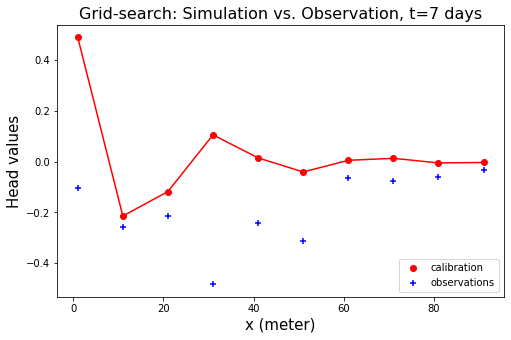

In [ ]:
# initialize x and y coordinates
y = h_values_gridsearch[0:10]
z = head7
x = [1,11,21,31,41,51,61,71,81,91]

plt.figure(figsize=(8, 5))  
# set the title of a plot
plt.title("Grid-search: Simulation vs. Observation, t=7 days", fontsize = 16)
  
# plot scatter plot with x and y data
plt.scatter(x, y,color='r',label="calibration")
plt.scatter(x,z,color='b',marker='+',label="observations")
plt.xlabel('x (meter)', fontsize=15)
plt.ylabel("Head values", fontsize=15)
plt.legend(loc="lower right")

# plot with x and y data
plt.plot(x, y, color='r')

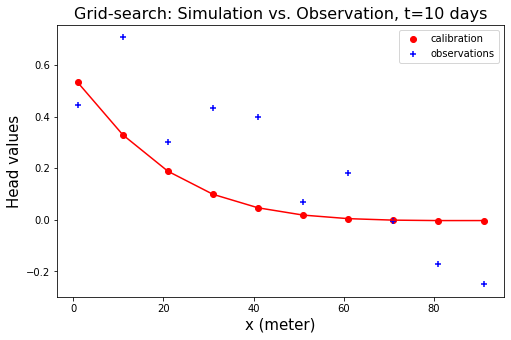

In [ ]:
# initialize x and y coordinates
y = h_values_gridsearch[10:20]
z = head10
x = [1,11,21,31,41,51,61,71,81,91]

plt.figure(figsize=(8, 5))  
# set the title of a plot
plt.title("Grid-search: Simulation vs. Observation, t=10 days", fontsize = 16)
  
# plot scatter plot with x and y data
plt.scatter(x, y,color='r',label="calibration")
plt.scatter(x,z,color='b',marker='+',label="observations")
plt.xlabel('x (meter)', fontsize=15)
plt.ylabel("Head values", fontsize=15)

plt.legend(loc="upper right")

# plot with x and y data
plt.plot(x, y, color='r')

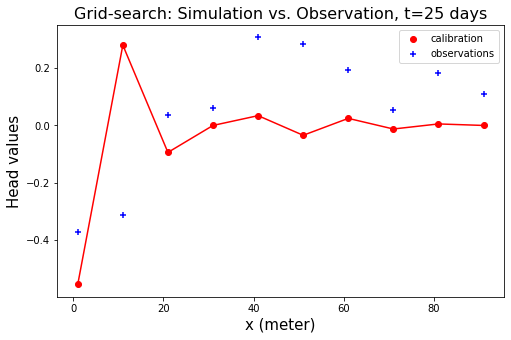

In [ ]:
# initialize x and y coordinates
y = h_values_gridsearch[20:30]
z = head25
x = [1,11,21,31,41,51,61,71,81,91]

plt.figure(figsize=(8, 5))  
# set the title of a plot
plt.title("Grid-search: Simulation vs. Observation, t=25 days", fontsize = 16)
  
# plot scatter plot with x and y data
plt.scatter(x, y,color='r',label="calibration")
plt.scatter(x,z,color='b',marker='+',label="observations")
plt.xlabel('x (meter)', fontsize=15)
plt.ylabel("Head values", fontsize=15)
plt.legend(loc="upper right")

# plot with x and y data
plt.plot(x, y, color='r')

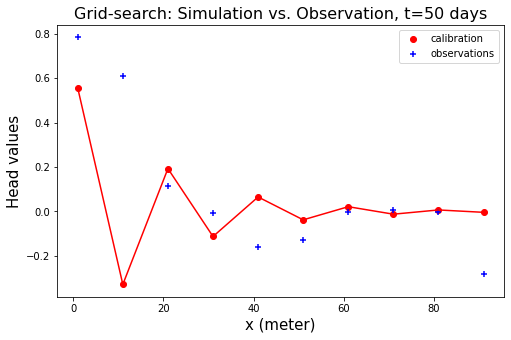

In [ ]:
# initialize x and y coordinates
y = h_values_gridsearch[30:40]
z = head50
x = [1,11,21,31,41,51,61,71,81,91]

plt.figure(figsize=(8, 5))  
# set the title of a plot
plt.title("Grid-search: Simulation vs. Observation, t=50 days", fontsize = 16)
  
# plot scatter plot with x and y data
plt.scatter(x, y,color='r',label="calibration")
plt.scatter(x,z,color='b',marker='+',label="observations")
plt.xlabel('x (meter)', fontsize=15)
plt.ylabel("Head values", fontsize=15)
plt.legend(loc="upper right")

# plot with x and y data
plt.plot(x, y, color='r')

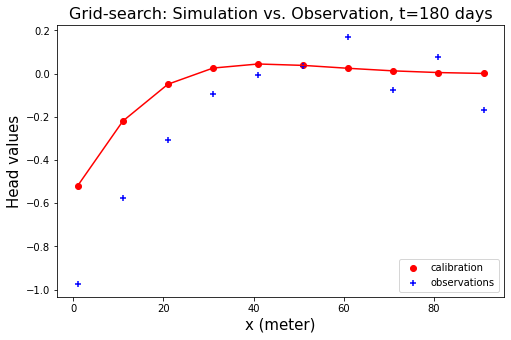

In [ ]:
# initialize x and y coordinates
y = h_values_gridsearch[40:50]
z = head180
x = [1,11,21,31,41,51,61,71,81,91]

plt.figure(figsize=(8, 5))   
# set the title of a plot
plt.title("Grid-search: Simulation vs. Observation, t=180 days", fontsize = 16)
  
# plot scatter plot with x and y data
plt.scatter(x, y,color='r',label="calibration")
plt.scatter(x,z,color='b',marker='+',label="observations")
plt.xlabel('x (meter)', fontsize=15)
plt.ylabel("Head values", fontsize=15)
plt.legend(loc="lower right")

# plot with x and y data
plt.plot(x, y, color='r')

# Monte Carlo Part

In [ ]:
#Define the parameters (by using random numbers)
#np.random.seed(321)
steps= 10

K_exp_min = 0
K_exp_max = 2
K_skalar = 8.64  #[m/d]
K_exp_MC = np.random.uniform(K_exp_min, K_exp_max, steps)
K_MC = np.power(K_skalar, K_exp_MC)
D_MC = ((K_MC * b) / sy)
print(D_MC)

A_MC = 5**np.random.uniform(-1, 1, size=steps)
print(A_MC)

w_min = (2 * math.pi) / 7
w_max = (2 * math.pi) / 2
w_MC = np.random.uniform(w_min, w_max, size=steps)
print(w_MC)

phase_min = 0
phase_max = math.pi
phase_MC = np.random.uniform(phase_min, phase_max, size=steps)
print(phase_MC)

[202.68180237 152.92855439  39.43829351 878.97313387 209.78899061
  59.21437382 547.94917997 556.51966374 239.37408407  69.65012909]
[4.86493136 0.23733238 0.28535643 0.85230106 0.49470104 3.49455013
 2.91688097 1.29760253 0.61527161 1.3050527 ]
[3.02098601 2.53247913 1.13425672 2.06209721 1.22810077 2.92616902
 1.47876528 2.25709906 1.25816128 2.88006245]
[0.87655906 1.12510249 2.79323061 0.67957495 1.35031082 0.90763467
 0.44248916 2.52400597 2.65509646 0.57034352]


In [ ]:
#go through all combinations, take difference from the measurements and find best parameters for all combinations of x and t

best_current_difference = np.inf

for c,Dlin in enumerate(D_MC):
    for d,Alin in enumerate(A_MC):
         for e,wlin in enumerate(w_MC):
                 for f,phaselin in enumerate(phase_MC):
                        h_combinations = []
                        for a,T in enumerate(t):
                            for b,X in enumerate(x):
                                h_combinations.append(calculate_hxt_for_one_variable(Dlin, Alin, wlin, phaselin, X, T))
                                
                        difference_current = np.sum(np.abs(np.subtract(h_combinations, head_obs_array))) 
                        #print(difference_current)
                    
                    
                        if difference_current <= best_current_difference:  
                            best_current_combination = [Dlin, Alin, wlin, phaselin]
                            best_current_difference = difference_current
                            #print(best_current_combination)
print(best_current_combination)
print(best_current_difference)
                       
     

[547.9491799736124, 0.6152716112256859, 2.257099056044341, 2.5240059676598583]
8.772254825344119


In [ ]:
h_values_MC = []
for a,T in enumerate(t):
    for b,X in enumerate(x):
        h_values_MC.append(calculate_hxt_for_one_variable(best_current_combination[0],best_current_combination[1],best_current_combination[2],best_current_combination[3], X, T))

In [ ]:
print(h_values_MC)

[0.5340718851047532, -0.012857798686005374, -0.22179904097385061, -0.10378444488558716, 0.03849883380639295, 0.060788765941770385, 0.01433303730140731, -0.017484460084573727, -0.014373244818515624, -7.273418800396168e-06, 0.5621779723634975, 0.37038323567988174, 0.23704212812397293, 0.14743055000634694, 0.08900108789542134, 0.05198022639620748, 0.029190222849253118, 0.015585068221236422, 0.007741197724087395, 0.003406888067655836, -0.5789043575599423, -0.1328482087368068, 0.20206001079845912, 0.10152706766997027, -0.057443796636745655, -0.05458825978348184, 0.010228989063646195, 0.024450938437747986, 0.00167245605024061, -0.009468523333442563, 0.5691052286732567, 0.35116667167777615, 0.1382248346407529, 0.0031032114731525946, -0.05251897929300492, -0.056264862182820605, -0.03774674242138736, -0.01683795077247272, -0.0024078201240544965, 0.004271450485954298, -0.5760824344804893, -0.22458830300866167, 0.10994309824407351, 0.15057672841991937, 0.03776468887434501, -0.04015658543934186, -

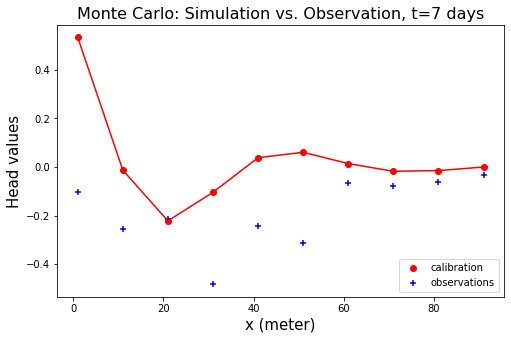

In [ ]:
# initialize x and y coordinates
y = h_values_MC[0:10]
z = head7
x = [1,11,21,31,41,51,61,71,81,91]

plt.figure(figsize=(8, 5))   
# set the title of a plot
plt.title("Monte Carlo: Simulation vs. Observation, t=7 days", fontsize = 16)
  
# plot scatter plot with x and y data
plt.scatter(x, y,color='r',label="calibration")
plt.scatter(x, z,color='b',marker='+',label="observations")
plt.xlabel('x (meter)', fontsize=15)
plt.ylabel("Head values", fontsize=15)
plt.legend(loc="lower right")

# plot with x and y data
plt.plot(x, y, color='r')

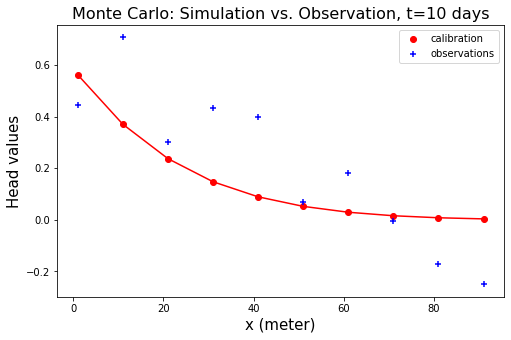

In [ ]:
# initialize x and y coordinates
y = h_values_MC[10:20]
z = head10
x = [1,11,21,31,41,51,61,71,81,91]

plt.figure(figsize=(8, 5))
# set the title of a plot
plt.title("Monte Carlo: Simulation vs. Observation, t=10 days", fontsize = 16)
  
# plot scatter plot with x and y data
plt.scatter(x, y,color='r',label="calibration")
plt.scatter(x, z,color='b',marker='+',label="observations")
plt.xlabel('x (meter)', fontsize=15)
plt.ylabel("Head values", fontsize=15)
plt.legend(loc="upper right")

# plot with x and y data
plt.plot(x, y, color='r')

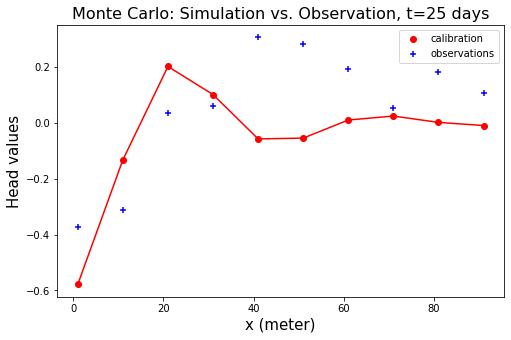

In [ ]:
# initialize x and y coordinates
y = h_values_MC[20:30]
z = head25
x = [1,11,21,31,41,51,61,71,81,91]

plt.figure(figsize=(8, 5))   
# set the title of a plot
plt.title("Monte Carlo: Simulation vs. Observation, t=25 days", fontsize = 16)
  
# plot scatter plot with x and y data
plt.scatter(x, y,color='r',label="calibration")
plt.scatter(x, z,color='b',marker='+',label="observations")
plt.xlabel('x (meter)', fontsize=15)
plt.ylabel("Head values", fontsize=15)
plt.legend(loc="upper right")

# plot with x and y data
plt.plot(x, y, color='r')

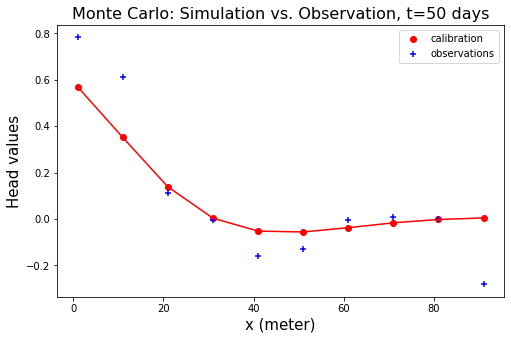

In [ ]:
# initialize x and y coordinates
y = h_values_MC[30:40]
z = head50
x = [1,11,21,31,41,51,61,71,81,91]

plt.figure(figsize=(8, 5))  
# set the title of a plot
plt.title("Monte Carlo: Simulation vs. Observation, t=50 days", fontsize = 16)
  
# plot scatter plot with x and y data
plt.scatter(x, y,color='r',label="calibration")
plt.scatter(x, z,color='b',marker='+',label="observations")
plt.xlabel('x (meter)', fontsize=15)
plt.ylabel("Head values", fontsize=15)
plt.legend(loc="upper right")

# plot with x and y data
plt.plot(x, y, color='r')

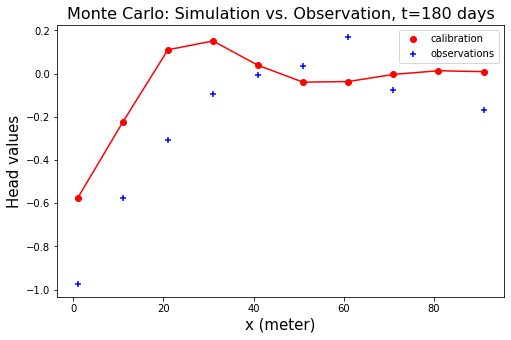

In [ ]:
# initialize x and y coordinates
y = h_values_MC[40:50]
z = head180
x = [1,11,21,31,41,51,61,71,81,91]

plt.figure(figsize=(8, 5))  
# set the title of a plot
plt.title("Monte Carlo: Simulation vs. Observation, t=180 days", fontsize = 16)
  
# plot scatter plot with x and y data
plt.scatter(x, y,color='r',label="calibration")
plt.scatter(x, z,color='b',marker='+',label="observations")
plt.xlabel('x (meter)', fontsize=15)
plt.ylabel("Head values", fontsize=15)
plt.legend(loc="upper right")

# plot with x and y data
plt.plot(x, y, color='r')

# Nelder-Mead Part

In [ ]:
# I am still trying to write a loss function that we have to minimize.
# We will use this function as the first parameter in scipy library. For details, please see the references.

'''
Reference:
https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html
https://docs.scipy.org/doc/scipy/reference/optimize.minimize-neldermead.html#optimize-minimize-neldermead
'''


'\nReference:\nhttps://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html\nhttps://docs.scipy.org/doc/scipy/reference/optimize.minimize-neldermead.html#optimize-minimize-neldermead\n'

In [ ]:
#Define an objective function that we want to minimize

#initial_parameter = [43.12779010783523, 1.052992921683777, 0.25993138281437717, 1.7942379459878974]
initial_parameter_Grid_Search = [439.16813004360273, 0.5848035476425731, 2.39359440273508, 1.0471975511965976]
initial_parameter_Monte_Carlo = [547.9491799736124, 0.6152716112256859, 2.257099056044341, 2.5240059676598583]

def objective_function(parameters):
  D = parameters[0]
  A = parameters[1]
  omega = parameters[2]
  phi = parameters[3]

  absolute = 0

  for a,T in enumerate(t):
    for b,X in enumerate(x):
      head = calculate_hxt_for_one_variable(D, A, omega, phi, X, T)
      
      absolute += np.abs(head_obs[a,b] - head)

  return absolute

In [ ]:
error_Grid_Search = scipy.optimize.minimize(objective_function, initial_parameter_Monte_Carlo, method = 'Nelder-Mead')

Best_D_NM = error_Grid_Search.x[0]
Best_A_NM = error_Grid_Search.x[1]
Best_Omega_NM = error_Grid_Search.x[2]
Best_phi_NM = error_Grid_Search.x[3]

#print(error)

print(Best_D_NM)
print(Best_A_NM)
print(Best_Omega_NM)
print(Best_phi_NM)

465.2550025188634
0.8560266581620135
2.2403526123728605
2.768582423928213


In [ ]:
h_combinations = []
for a,T in enumerate(t):
  for b,X in enumerate(x):
    h_combinations.append(calculate_hxt_for_one_variable(Best_D_NM, Best_A_NM, Best_Omega_NM, Best_phi_NM, X, T))
                                
difference_current = np.sum(np.abs(np.subtract(h_combinations, head_obs_array)))
print(difference_current)

7.965548959811644


In [ ]:
h_values_NM = []
for a,T in enumerate(t):
  for b,X in enumerate(x):
     h_values_NM.append(calculate_hxt_for_one_variable(Best_D_NM ,Best_A_NM, Best_Omega_NM, Best_phi_NM, X, T))

In [ ]:
print(h_values_NM)

[0.7453137575648701, 0.06436138731355825, -0.23842408382771815, -0.17571182438507063, -0.02235514074391233, 0.05164376582256245, 0.041213641160921785, 0.006847300702465541, -0.011093452752784852, -0.00961955192707849, 0.7774127216470235, 0.4876173683313273, 0.30318830456868123, 0.18692517831512728, 0.11428700041516916, 0.06929309134413167, 0.04165581795372644, 0.02482080066149922, 0.0146519447840057, 0.008562600416471047, -0.8008003308746651, -0.23404337379093804, 0.21517252890741412, 0.16583755384023274, -0.020440198941002734, -0.0695769328511036, -0.017598670803887162, 0.01968840332283968, 0.013743824037636803, -0.0023895924251502057, 0.7829278220967414, 0.4984984328058684, 0.28491799975710813, 0.14372540641438933, 0.05996327763319347, 0.015701209018607023, -0.004257704357386629, -0.010824650256336645, -0.010963023953925637, -0.008662263991193386, -0.7854969473479817, -0.4916981863053537, -0.25002969664003305, -0.09255733051539712, -0.00877302340813358, 0.024976663345842552, 0.030943

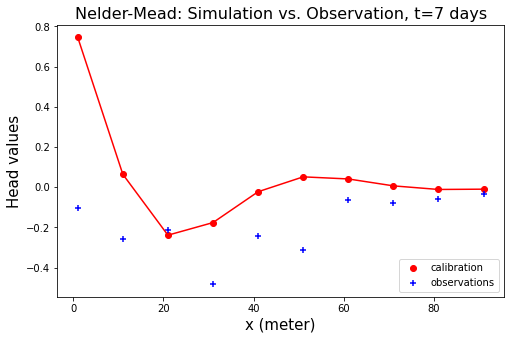

In [ ]:
# initialize x and y coordinates
y = h_values_NM[0:10]
z = head7
x = [1,11,21,31,41,51,61,71,81,91]

plt.figure(figsize=(8, 5))   
# set the title of a plot
plt.title("Nelder-Mead: Simulation vs. Observation, t=7 days", fontsize = 16)
  
# plot scatter plot with x and y data
plt.scatter(x, y,color='r',label="calibration")
plt.scatter(x, z,color='b',marker='+',label="observations")
plt.xlabel('x (meter)', fontsize=15)
plt.ylabel("Head values", fontsize=15)
plt.legend(loc="lower right")

# plot with x and y data
plt.plot(x, y, color='r')

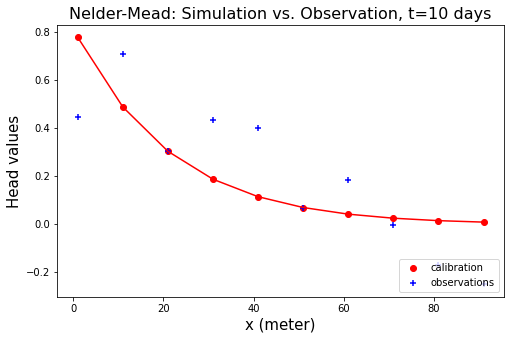

In [ ]:
# initialize x and y coordinates
y = h_values_NM[10:20]
z = head10
x = [1,11,21,31,41,51,61,71,81,91]

plt.figure(figsize=(8, 5))   
# set the title of a plot
plt.title("Nelder-Mead: Simulation vs. Observation, t=10 days", fontsize = 16)
  
# plot scatter plot with x and y data
plt.scatter(x, y,color='r',label="calibration")
plt.scatter(x, z,color='b',marker='+',label="observations")
plt.xlabel('x (meter)', fontsize=15)
plt.ylabel("Head values", fontsize=15)
plt.legend(loc="lower right")

# plot with x and y data
plt.plot(x, y, color='r')

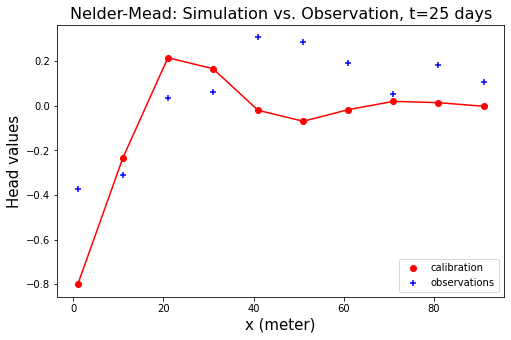

In [ ]:
# initialize x and y coordinates
y = h_values_NM[20:30]
z = head25
x = [1,11,21,31,41,51,61,71,81,91]

plt.figure(figsize=(8, 5))  
# set the title of a plot
plt.title("Nelder-Mead: Simulation vs. Observation, t=25 days", fontsize = 16)
  
# plot scatter plot with x and y data
plt.scatter(x, y,color='r',label="calibration")
plt.scatter(x, z,color='b',marker='+',label="observations")
plt.xlabel('x (meter)', fontsize=15)
plt.ylabel("Head values", fontsize=15)
plt.legend(loc="lower right")

# plot with x and y data
plt.plot(x, y, color='r')

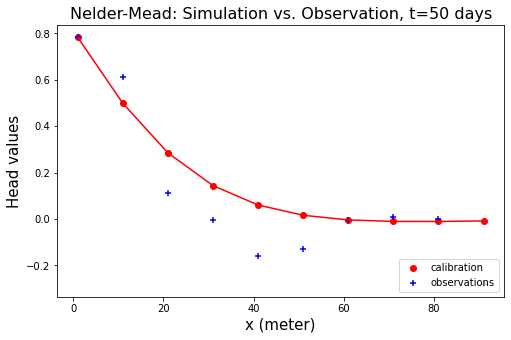

In [ ]:
# initialize x and y coordinates
y = h_values_NM[30:40]
z = head50
x = [1,11,21,31,41,51,61,71,81,91]

plt.figure(figsize=(8, 5))  
# set the title of a plot
plt.title("Nelder-Mead: Simulation vs. Observation, t=50 days", fontsize=16)
  
# plot scatter plot with x and y data
plt.scatter(x, y,color='r',label="calibration")
plt.scatter(x, z,color='b',marker='+',label="observations")
plt.xlabel('x (meter)', fontsize=15)
plt.ylabel("Head values", fontsize=15)
plt.legend(loc="lower right")

# plot with x and y data
plt.plot(x, y, color='r')

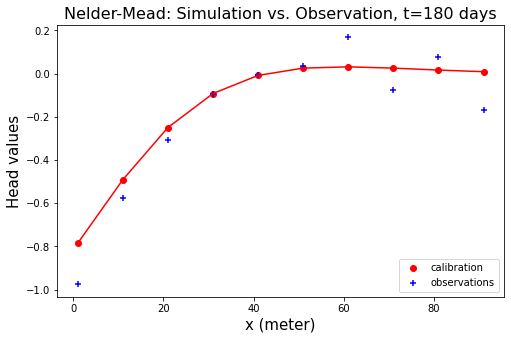

In [ ]:
# initialize x and y coordinates
y = h_values_NM[40:50]
z = head180
x = [1,11,21,31,41,51,61,71,81,91]

plt.figure(figsize=(8, 5))  
# set the title of a plot
plt.title("Nelder-Mead: Simulation vs. Observation, t=180 days", fontsize=16)
  
# plot scatter plot with x and y data
plt.scatter(x, y,color='r',label="calibration")
plt.scatter(x, z,color='b',marker='+',label="observations")
plt.xlabel('x (meter)', fontsize=15)
plt.ylabel("Head values", fontsize=15)
plt.legend(loc="lower right")

# plot with x and y data
plt.plot(x, y, color='r')